## Violations Search Tau Refined

> Written by Jess Breda September 2023

Building on 2023_09_violation_search_tau_macro

The goals for this NB are

1. Run a refined search of taus and sigmas across animals

* "sigmas": [0, 0.001, 0.05, 0.1, 0.2, 0.4, 0.5],

* "taus": [0, 1, 2, 3, 4, 5, 6, 7]

In [16]:
import pathlib
import sys
[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_context("talk")


# from get_rat_data import *
from sigma_tau_search_experiment import SigmaTauSearchExperiment

MODE = "local"

# settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO: 

In [4]:
params = {
    "animals": None,
    "sigmas": [0, 0.001, 0.05, 0.1, 0.2, 0.4, 0.5],
    "taus": [2, 3, 4, 5, 6, 7],
    "random_state": 44,
    "test_size": 0.25,
}

refined_experiment = SigmaTauSearchExperiment(params)
results = refined_experiment.run()

returning dataset for all animals


 !!!!! evaluating animal W051 !!!!!


         Current function value: 494995.510783
         Iterations: 24
         Function evaluations: 119
         Gradient evaluations: 107
         Current function value: 491980.990043
         Iterations: 25
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 491452.074116
         Iterations: 26
         Function evaluations: 116
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 491957.318691
         Iterations: 26
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 492933.244426
         Iterations: 27
         Function evaluations: 132
         Gradient evaluations: 114
         Current function value: 494124.499099
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         C

In [46]:
refined_experiment.animals

array(['W051', 'W060', 'W061', 'W062', 'W065', 'W066', 'W068', 'W072',
       'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083',
       'W088', 'W089', 'W094'], dtype=object)

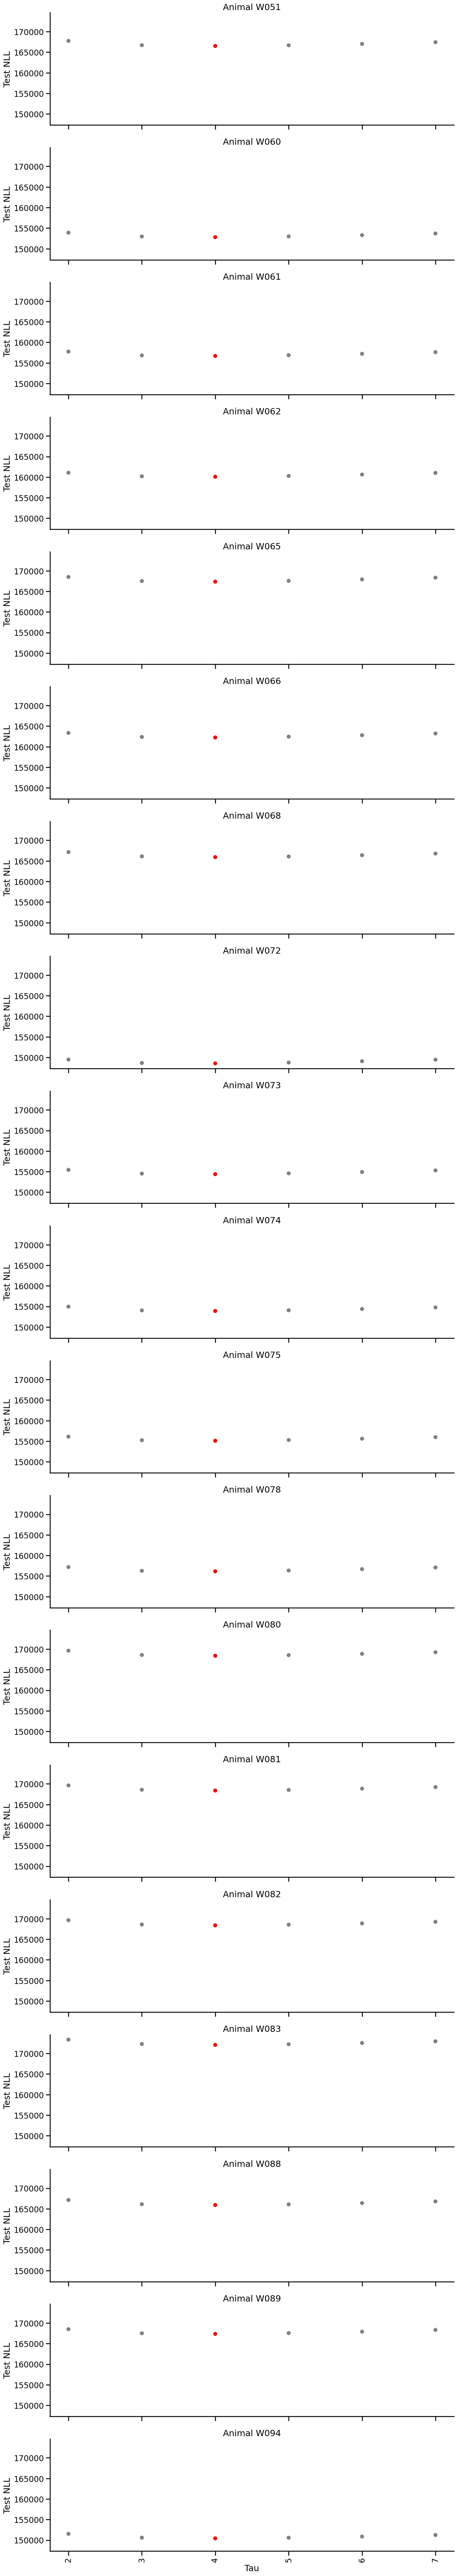

In [5]:
refined_experiment.plot_nll_over_taus()

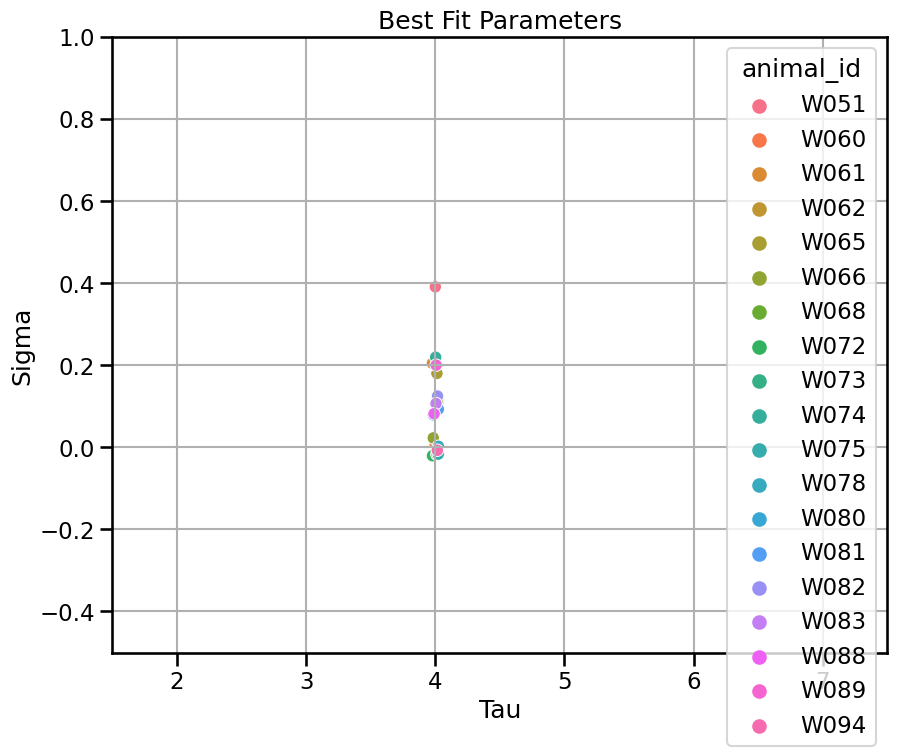

In [6]:
refined_experiment.plot_best_sigma_tau_by_animal(jitter=0.025)

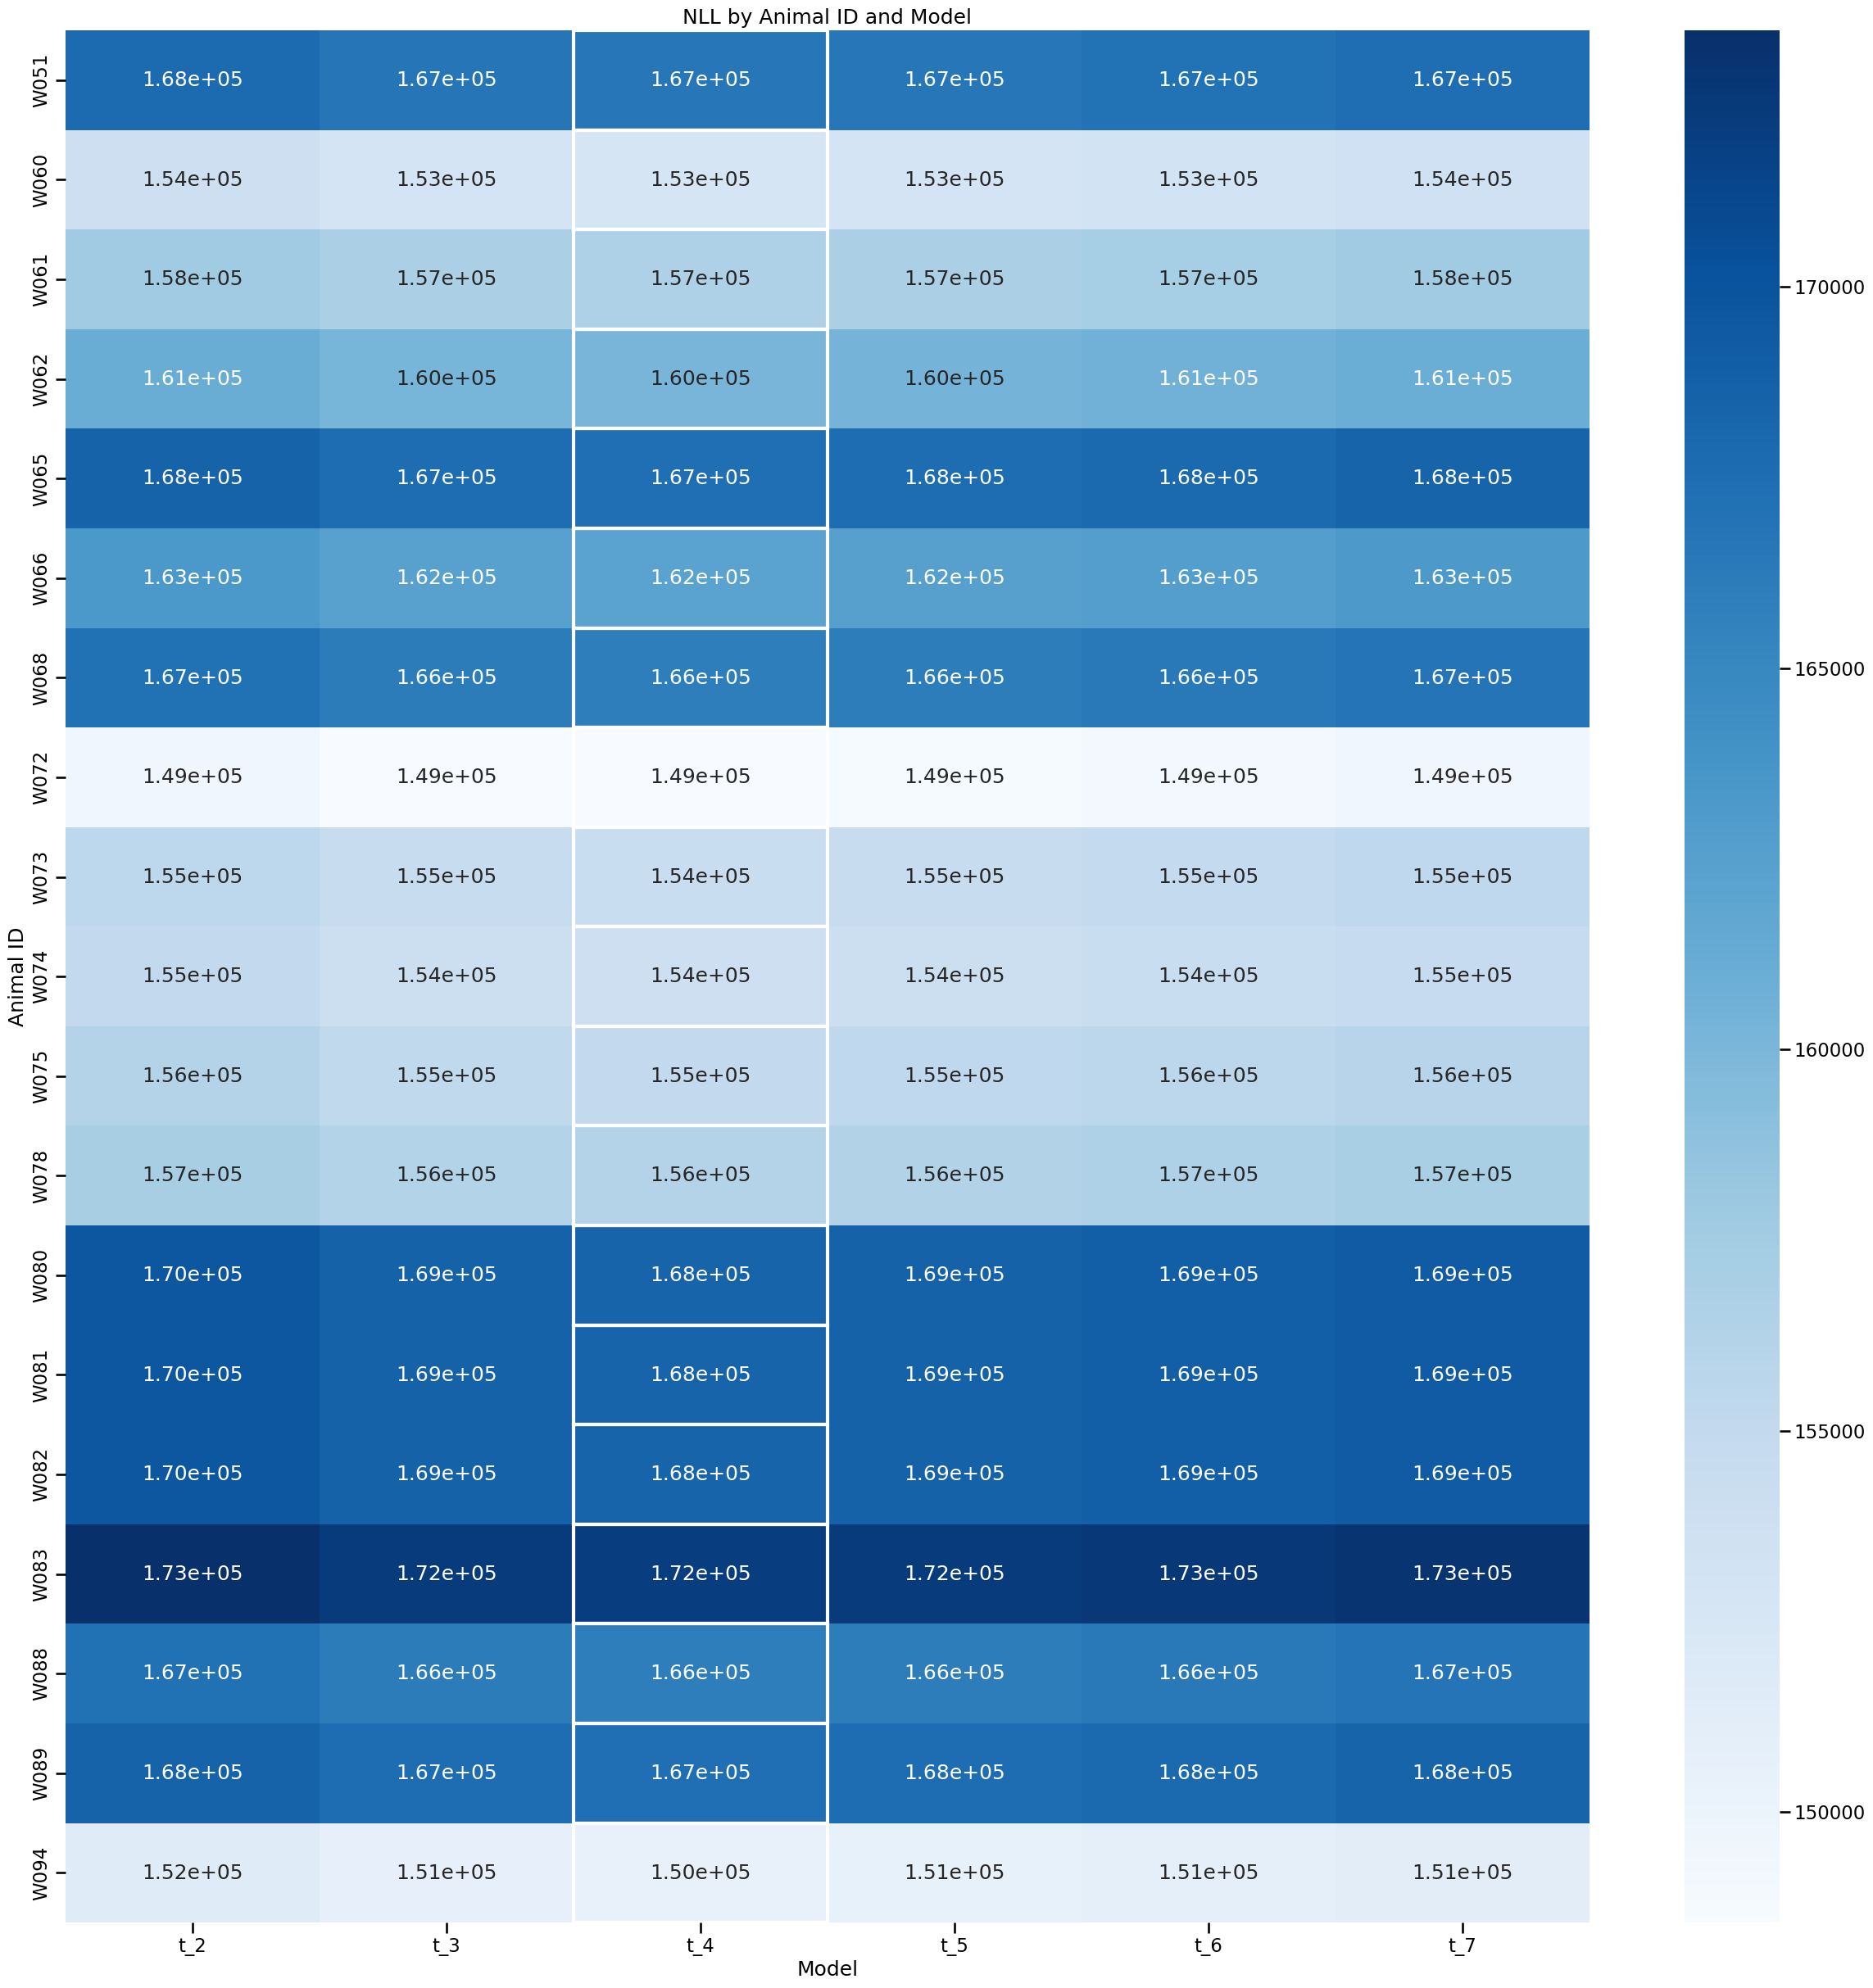

In [7]:
refined_experiment.plot_tau_heatmap()

In [8]:
refined_experiment.find_best_fit(group="animal_id")

,animal_id,model_name,sigma,tau,nll
0,W051,t_4,0.4,4,166503.299833
1,W060,t_4,0.0,4,152808.560074
2,W061,t_4,0.2,4,156688.011925
3,W062,t_4,0.1,4,160091.511381
4,W065,t_4,0.2,4,167347.334053
5,W066,t_4,0.0,4,162237.205056
6,W068,t_4,0.1,4,165918.020980
7,W072,t_4,0.0,4,148550.484335
8,W073,t_4,0.0,4,154395.521092
9,W074,t_4,0.2,4,153892.106925


In [9]:
refined_experiment.results.to_csv("refined_sweep.csv", index=False)

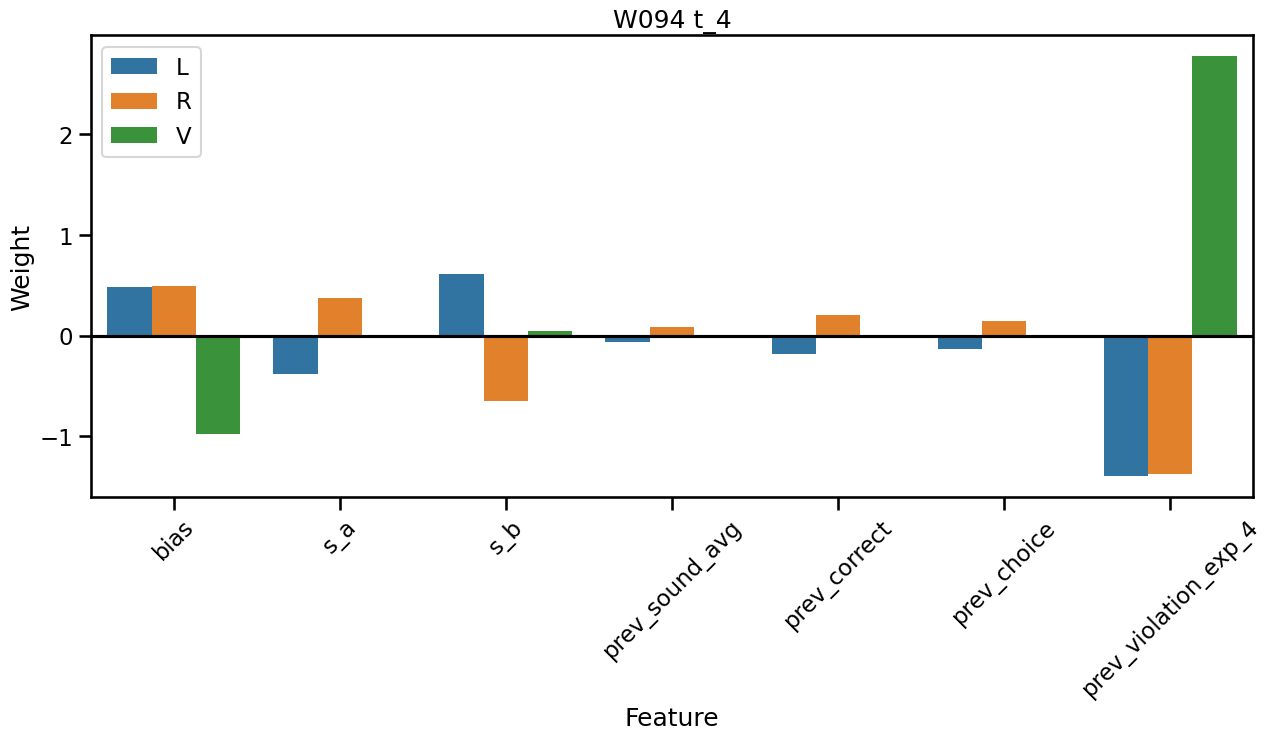

In [10]:
refined_experiment.plot_class_weights(animal_id="W094", model_name="t_4")

In [27]:
sigma_df = refined_experiment.find_best_fit(group="sigma")

In [25]:
def plot_nll_over_sigmas(experiment, df=None):  # self
    # if df is None:
    #     df = self.find_best_fit(group="tau")

    if df is None:
        df = experiment.find_best_fit(group="sigma")

    n_animals = df.animal_id.nunique()
    fig, ax = plt.subplots(
        n_animals, 1, figsize=(15, 5 * n_animals), sharex=True, sharey=True
    )

    df["is_min"] = df.groupby("animal_id")["nll"].transform(lambda x: x == x.min())

    if n_animals == 1:
        ax = [ax]

    for idx, (animal_id, sub_df) in enumerate(df.groupby("animal_id")):
        plt.xticks(rotation=90)

        current_ax = ax[idx] if n_animals > 1 else ax[0]

        sns.scatterplot(
            x="sigma",
            y="nll",
            data=sub_df,
            ax=current_ax,
            hue="is_min",
            palette=["grey", "red"],
        )

        # aesthetics
        plt.xticks(rotation=90)
        sns.despine()
        current_ax.legend().remove()
        current_ax.set(
            ylabel="Test NLL",
            title=f"Animal {animal_id}",
        )
        # if on the last plot, add the x-axis label
        if idx == n_animals - 1:
            current_ax.set(xlabel="Sigma")
        else:
            current_ax.set(xlabel="")

    return None

In [28]:
sigma_df.groupby("animal_id").head()

,animal_id,model_name,sigma,tau,nll
0,W051,t_4,0.000,4,166503.314486
1,W051,t_2,0.001,2,200521.415735
2,W051,t_4,0.050,4,166533.990438
3,W051,t_4,0.100,4,166505.132284
4,W051,t_4,0.200,4,166503.360853
...,...,...,...,...,...
126,W094,t_4,0.000,4,150423.643221
127,W094,t_2,0.001,2,182611.523955
128,W094,t_4,0.050,4,150465.884965
129,W094,t_4,0.100,4,150427.496716


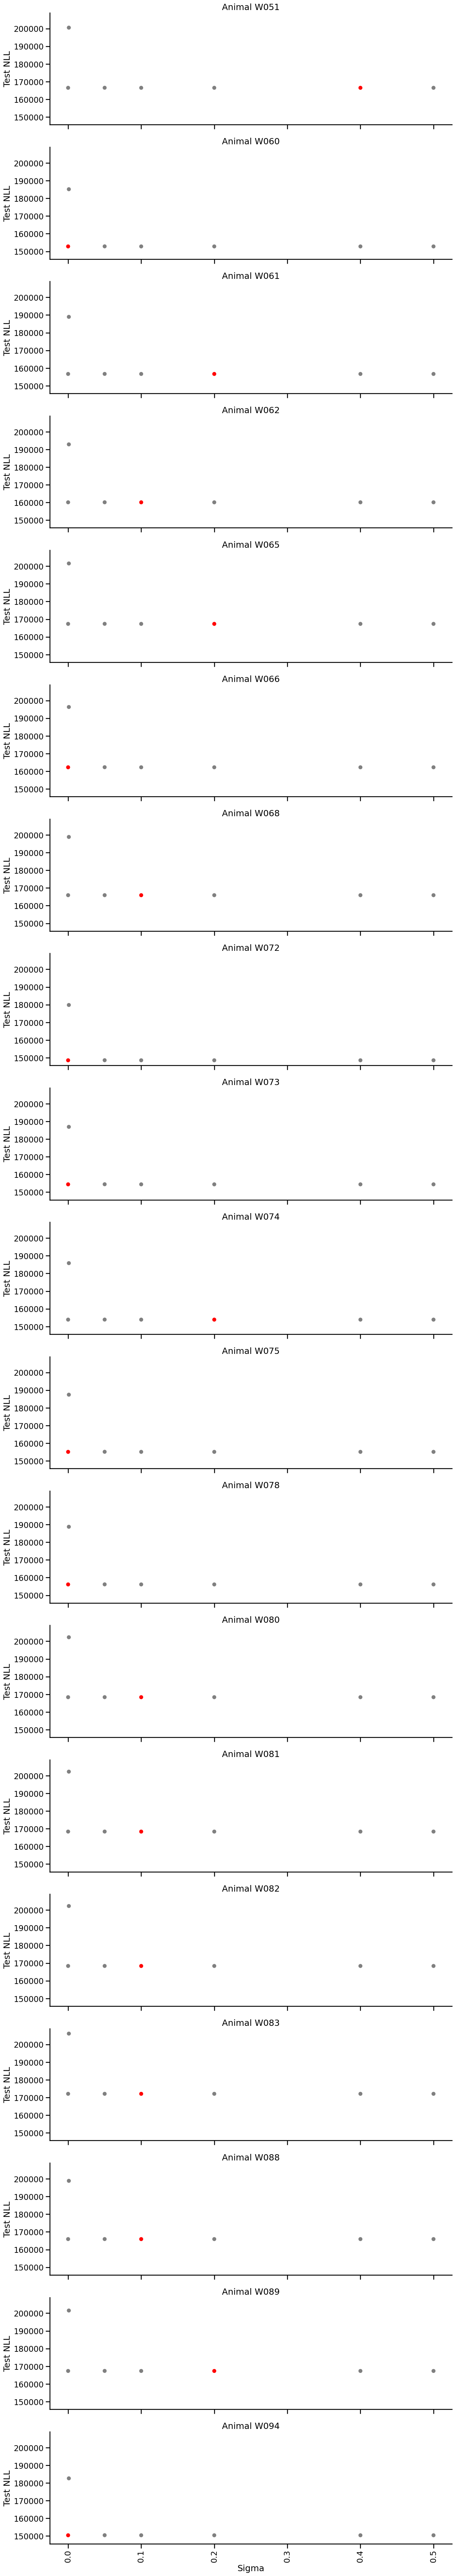

In [26]:
plot_nll_over_sigmas(refined_experiment)

In [29]:
params = {
    "animals": None,
    "sigmas": [0.001],
    "taus": [4],
    "random_state": 44,
    "test_size": 0.25,
}

sigma_experiment = SigmaTauSearchExperiment(params)
results = sigma_experiment.run()

returning dataset for all animals


 !!!!! evaluating animal W051 !!!!!


         Current function value: 597014.379532
         Iterations: 23
         Function evaluations: 61
         Gradient evaluations: 61


 !!!!! evaluating animal W060 !!!!!


Optimization terminated successfully.
         Current function value: 544118.249694
         Iterations: 34
         Function evaluations: 78
         Gradient evaluations: 78


 !!!!! evaluating animal W061 !!!!!


         Current function value: 556112.343194
         Iterations: 26
         Function evaluations: 64
         Gradient evaluations: 64


 !!!!! evaluating animal W062 !!!!!


Optimization terminated successfully.
         Current function value: 568199.167036
         Iterations: 27
         Function evaluations: 65
         Gradient evaluations: 65


 !!!!! evaluating animal W065 !!!!!


